In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()

df = pd.DataFrame(data= housing.data, columns=housing.feature_names)
df['MEDV'] = housing.target
print(df.head())

print("dataframe shape", df.shape)

print("\ninfo")
df.info()

print("\n descripton")
df.describe()

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   MEDV  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
dataframe shape (20640, 9)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 n

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('MEDV', axis=1)
Y = df['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, Y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("mean squared error", mse)

# The model's coefficients (weights)
print("Model Coefficients (Weights):", model.coef_)

# The model's intercept (bias)
print("Model Intercept (Bias):", model.intercept_)

mean squared error 0.5558915986952444
Model Coefficients (Weights): [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Model Intercept (Bias): -37.02327770606409


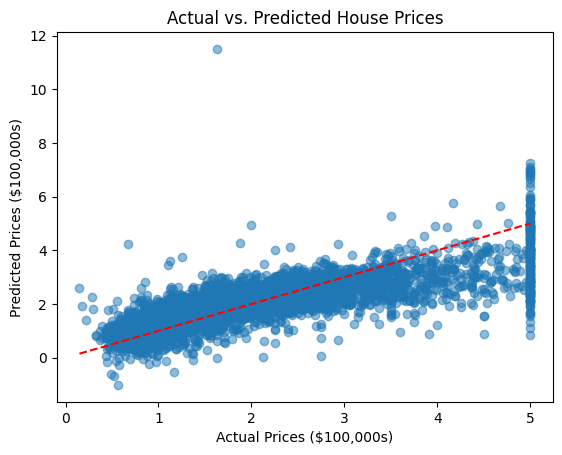

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of the actual values vs. the predicted values
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.title('Actual vs. Predicted House Prices')
plt.xlabel('Actual Prices ($100,000s)')
plt.ylabel('Predicted Prices ($100,000s)')

# Add a diagonal line for perfect prediction
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Create a new data point for a hypothetical house.
# Make sure the order of features is the same!
new_house_data = [[6.5, 30.0, 5.0, 1.2, 1200.0, 3.0, 34.1, -118.5]]

# Convert the list to a pandas DataFrame with the correct column names
# These names must be the same as the ones from your original DataFrame
feature_names = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
new_house_df = pd.DataFrame(data=new_house_data, columns=feature_names)

# Now, use the new DataFrame to make the prediction
predicted_price = model.predict(new_house_df)

# Print the predicted price
print(f"The predicted price of the house is: ${predicted_price[0] * 100000:,.2f}")

The predicted price of the house is: $357,446.15


From this point it will be logistic Regression

ogistic regression is used for classification problems. We'll use the breast cancer dataset, where the goal is to classify a tumor as either benign (non-cancerous) or malignant (cancerous).

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
df['target'] = digits.target
print(df.head())

print("dataframe shape", df.shape)


   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        0.0        0.0   
3        0.0        0.0        0.0        8.0  ...        0.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
0        0.0        6.0       13.0       10.0

In [ ]:
from sklearn.linear_model import LogisticRegression

X = df.drop('target', axis=1)
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42, stratify=Y)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, Y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 95.83%


In [ ]:
import pandas as pd
import numpy as np

# Create a new data point based on the first image
manual_input_pixels = np.copy(digits.data[0])
manual_input_pixels[10] = 16

# Reshape the data for a single row
manual_input_data = manual_input_pixels.reshape(1, -1)

# Get the feature names that your model was trained on
feature_names = df.drop('target', axis=1).columns

# Convert the NumPy array to a DataFrame with the correct column names
manual_input_df = pd.DataFrame(data=manual_input_data, columns=feature_names)

# Make the prediction using the DataFrame
manual_prediction = model.predict(manual_input_df)

# Print the predicted digit
print(f"The model's prediction for the handwritten digit is: {manual_prediction[0]}")

The model's prediction for the handwritten digit is: 0
